In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os.path

#initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#twitter API Keys (load from untracked_api_key.txt)
with open('untracked_api_key_twitter.txt', 'r') as file_object:
    #Text document that is untracked in project-one directory (NOT pushed to git) with API key
    #Create a file called untracked_api_key.txt with your key and DO NOT add to git when commiting or pushing changes file_object.readline()
    consumer_key  = str(file_object.readline()).strip()
    consumer_secret = str(file_object.readline()).strip()
    access_token = str(file_object.readline()).strip()
    access_token_secret = str(file_object.readline()).strip()

#tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_user_list = ["@BBCNews", "@CBS", "@CNN", "@foxnews","@nytimes"]
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for user in target_user_list:
        counter = 1
        #Obtain 100 recent tweets from home feed per user in target_user_list
        public_tweets = api.user_timeline(user, count = 100, result_type="recent")

        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter

            # Add sentiments for each tweet into an array
            sentiments.append({"User":user,
                               "Date": tweet["created_at"], 
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
          
            # Add to counter 
            counter = counter + 1


In [3]:
#convert sentiment list into dataframe object
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#reorder columns in dataframe
sentiments_pd = sentiments_pd[['User','Date','Tweet','Tweets Ago','Compound','Negative','Neutral','Positive']]

sentiments_pd.head()

,User,Date,Tweet,Tweets Ago,Compound,Negative,Neutral,Positive
0,@BBCNews,Sat Mar 31 16:25:04 +0000 2018,RT @BBCSport: An inspirational young man. 👏\n\...,1,0.1531,0.778,0.100,0.122
1,@BBCNews,Sat Mar 31 16:24:27 +0000 2018,RT @BBCSteveR: After reading today's Russian p...,2,0.6647,0.628,0.105,0.267
2,@BBCNews,Sat Mar 31 16:03:08 +0000 2018,RT @BBCSport: FT: Brighton 0-2 Leicester\n\nIt...,3,-0.5983,0.795,0.205,0.000
3,@BBCNews,Sat Mar 31 16:03:02 +0000 2018,RT @BBCSport: FT: West Brom 1-2 Burnley \n\nIt...,4,0.5994,0.691,0.084,0.225
4,@BBCNews,Sat Mar 31 16:02:59 +0000 2018,RT @BBCSport: FT: Watford 2-2 Bournemouth \n\n...,5,0.0000,1.000,0.000,0.000


In [4]:
# save sentiment data to csv
sentiments_pd.to_csv("TwitterMoodSentiment.csv")

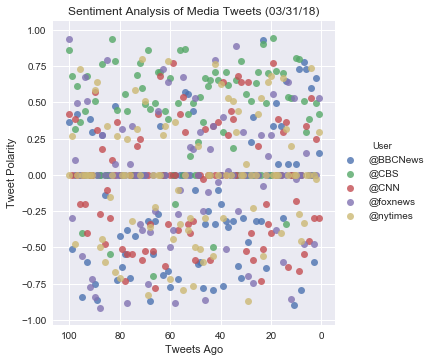

In [5]:
#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#sentiments_pd_grouped.count().head()
#for user in sentiments_pd_grouped["User"]:
#plt.scatter(sentiments_pd_grouped["Tweets Ago"],sentiments_pd_grouped["Compound"])
#plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
#plt.legend(sentiments_pd["User"])
#plt.ylabel("Tweet Polarity")
#plt.xlabel("Tweets Ago")
#plt.show()

sns.lmplot("Tweets Ago", "Compound", data=sentiments_pd, hue='User', fit_reg=False)
sns.plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
sns.plt.ylabel("Tweet Polarity")
sns.plt.xlabel("Tweets Ago")
sns.plt.gca().invert_xaxis()
plt.savefig("general_tweet_sentiment_scatter")
sns.plt.show()


In [10]:

#sentiments_pd_grouped = sentiments_pd.groupby(['User'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#plt.bar(sentiments_pd['User'], sentiments_pd['Compound'],color=["lightblue", 'green', 'red', 'blue', 'gold'])
#plt.title("Overall Media Sentiment of Tweets (%s)" % (time.strftime("%x")))
#plt.ylabel("Tweet Polarity")
#plt.xlabel("User Account")
#plt.legend(['Compound','Negative','Neutral','Positive'])
#color=["lightblue", 'green', 'red', 'blue', 'gold']
#sentiments_pd[['Compound','Negative','Neutral','Positive']]
#plt.legend()
#plt.savefig("overall_tweet_sentiment_bar")
#plt.show()

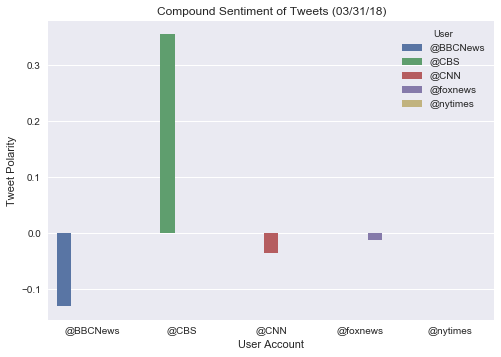

In [7]:
sns.barplot("User", "Compound", data=sentiments_pd, hue='User',ci=None)
sns.plt.title("Compound Sentiment of Tweets (%s)" % (time.strftime("%x")))
sns.plt.ylabel("Tweet Polarity")
sns.plt.xlabel("User Account")
plt.savefig("compound_tweet_sentiment_bar")
sns.plt.show()
